# Aula 5 - Exercícios - Estatística Descritiva e Gráficos

In [2]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np
import seaborn as sns

### 5.1 Escreva uma função para calcular os percentis [0.25, 0.50, 0.75, 0.9] do dataset do índice de gini dos municípios brasileiros para todos os anos presents no dataset.

#### Apenas por curiosidade, plote o gráfico destes percentis num gráfico de linhas


In [1]:
# Dica 1: Descubra qual a string representa valores NA neste dataset.
# Dica 2: Use o argumento na_values para especificar a string que representa valores NA.
# Dica 3: Use o argumento decimal=',' para definir a vírgula como separador de decimal.
# Dica 4: Use a função apply e uma função lambda para desmembrar a coluna município no
#         respectivo nome e código do município.
# Dica 5: Atente para o separador de colunas do dataset.
# Dica 6: O encoding do dataset do gini é 'utf8'.
# Dica 7: Atente para quantas linhas você deve ignorar antes no inicio e no final do arquivo.
# Dica 8: Use a função quantile
def plot_gini(path_gini):
    """retorne o valor de: n+nn+nnn
    """
    ### BEGIN SOLUTION
    df_gini = pd.read_csv(path_gini, sep=';', skiprows=2, skipfooter=2, encoding='utf8', 
                          engine='python', na_values='...', decimal=',')
    df_gini.loc[:, 'cod_ibge6'] = df_gini.loc[:,'Município'].apply(lambda x: x.split(' ')[0])
    df_gini.loc[:, 'Município'] = df_gini.loc[:,'Município'].apply(lambda x: ' '.join(x.split(' ')[1:]))

    return df_gini.quantile([.25, .5, .75, .9])
    
    ### END SOLUTION


In [2]:
## Faça seus testes aqui
# Considere o seguinte dataframe do PIB dos municípios
path_gini = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/gini/ginibr.csv'




In [5]:
# Validação
test_data = {'1991': {0.25: 0.49, 0.5: 0.53, 0.75: 0.58, 0.9: 0.62},
 '2000': {0.25: 0.51, 0.5: 0.55, 0.75: 0.6, 0.9: 0.64},
 '2010': {0.25: 0.46, 0.5: 0.5, 0.75: 0.55, 0.9: 0.58}}
path_gini = 'https://github.com/alexlopespereira/curso_ciencia_dados2020/raw/master/data/originais/gini/ginibr.csv'

df = plot_gini(path_gini)
assert df.apply(lambda x: round(x, 2)).to_dict() == test_data

### 5.2 Escreva uma função para retornar um dataframe com os nomes das colunas, o total e a porcentagem de valores NA (de cada coluna) num dataframe passado como argumento para esta função.
#### Arredonde (com o método round) o resultado para duas casas decimais (o assert vai testar com 2 casas decimais).

In [2]:
# Dica 1: Use a função concat para concatenar duas séries. Especifique axis=1 para concatenar
#       por colunas. Se quiser dar nome as colunas depois de concatenar, utilize o argumento
#       keys=['Total','Porcentagem']
# Dica 2: Uma das séries deve conter o total de valores NA, e a outra série a 
# porcentagem de valores NA. Depois disso concatena-as usando a função concat.

def missing_percentage(df):
    """Retorna um dataframe com os nomes das colunas, o total e a porcentagem de valores
       NA em cada coluna do dataframe passado como argumento.
    """
    ### BEGIN SOLUTION
    total = df.isnull().sum()
    percent = round(df.isnull().sum()/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Porcentagem'])
    ### END SOLUTION


In [6]:
## Faça seus testes aqui
# path_titanic = 'https://github.com/alexlopespereira/curso_ciencia_dados2020/raw/master/data/originais/titanic/titanic.xls'
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'


In [3]:
# Validação
path_titanic = 'https://github.com/alexlopespereira/curso_ciencia_dados2020/raw/master/data/originais/titanic/titanic.xls'
test_data = {'Total': {'body': 1188,  'cabin': 1014,  'boat': 823,  'home.dest': 564,
                       'age': 263,  'embarked': 2,  'fare': 1,  'ticket': 0,  'parch': 0,  
                       'sibsp': 0,  'sex': 0,  'name': 0,  'survived': 0,  'pclass': 0},
             'Porcentagem': {'body': 90.76,  'cabin': 77.46,  'boat': 62.87,
                            'home.dest': 43.09,  'age': 20.09,  'embarked': 0.15, 
                            'fare': 0.08,  'ticket': 0.0,  'parch': 0.0,  'sibsp': 0.0,
                            'sex': 0.0,  'name': 0.0,  'survived': 0.0,  'pclass': 0.0}}

df_titanic = pd.read_excel(path_titanic)
assert missing_percentage(df_titanic).to_dict() == test_data

### 5.3 Considerando o dataset do titanic, crie um gráfico igual ao modelo abaixo.
#### Dica: use o gráfico distplot da biblioteca seaborn.

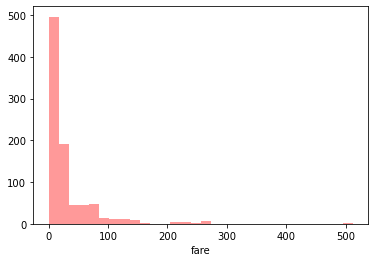

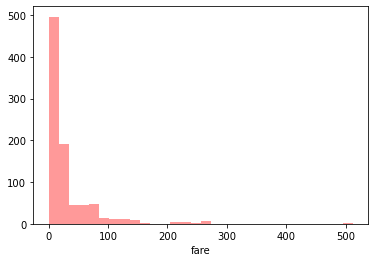

In [4]:
## Faça seus testes aqui
titanic = sns.load_dataset('titanic')
sns.distplot(titanic['fare'],bins=30,kde=False,color='red')

### 5.4 Considerando o dataset do titanic, crie um gráfico igual ao modelo abaixo.
#### Dica: use o gráfico distplot da biblioteca seaborn.

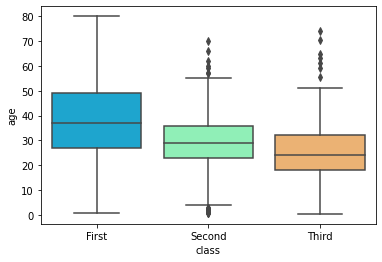

In [ ]:
## Faça seus testes aqui
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow' )